In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv('/content/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 1 часть

## Часть 1
## Нам нужно будет ответить на следующие вопросы:
## Найдите количество спален(bedrooms) в самом дешёвом доме. Если таких несколько, укажите наименьшее значение.


In [ ]:
df[df['price'] == df['price'].min()]['bedrooms'].min()

2

## Найдите количество домов, в которых количество спален не больше количества ванных(bathrooms).

In [ ]:
df[df['bedrooms'] <= df['bathrooms']]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
33,8190000,5960,3,3,2,yes,yes,yes,no,no,1,no,unfurnished
73,6685000,6600,2,2,4,yes,no,yes,no,no,0,yes,furnished
153,5530000,3300,3,3,2,yes,no,yes,no,no,0,no,semi-furnished
167,5285000,4600,2,2,1,yes,no,no,no,yes,2,no,semi-furnished
248,4543000,4100,2,2,1,yes,yes,yes,no,no,0,no,semi-furnished
341,3850000,3180,2,2,1,yes,no,yes,no,no,2,no,semi-furnished
348,3815000,3150,2,2,1,no,no,yes,no,no,0,no,semi-furnished
374,3640000,3520,2,2,1,yes,no,yes,no,no,0,no,semi-furnished


## Сколько стоит самый дешёвый дом с гостевой комнатой(guestroom)?

In [ ]:
df[df['guestroom'] == 'yes']['price'].min()

2450000

## Рассмотрим дома ценой от 5.000.000 или до 2.000.000 денег. Какая часть из них может похвастаться кондиционированием воздуха(airconditioning)?

In [ ]:
(df[(df['price'] >= 5000000) | (df['price'] < 2000000)]['airconditioning'] == 'yes').sum()/len(df[(df['price'] >= 5000000) | (df['price'] < 2000000)]['airconditioning'] == 'yes')

0.5392156862745098

### 2 часть

## Постройте график, на котором будут отмечены все квартиры в виде точек, у которых x координата это цена(price), а y - площадь(area). Отметьте разными цветами точки, которые соответствуют квартирам с разным количеством парковочных мест(parking). Не забывайте о прозрачности.

In [ ]:
df['parking'].unique()

array([2, 3, 0, 1])

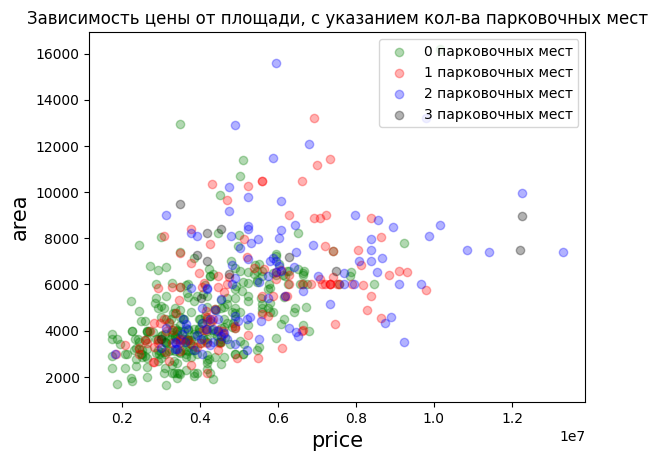

In [ ]:
plt.scatter(df[df['parking'] == 0]['price'], df[df['parking'] == 0]['area'], label='0 парковочных мест', color='g', alpha=0.3)
plt.scatter(df[df['parking'] == 1]['price'], df[df['parking'] == 1]['area'], label='1 парковочных мест', color='r', alpha=0.3)
plt.scatter(df[df['parking'] == 2]['price'], df[df['parking'] == 2]['area'], label='2 парковочных мест', color='b', alpha=0.3)
plt.scatter(df[df['parking'] == 3]['price'], df[df['parking'] == 3]['area'], label='3 парковочных мест', color='black', alpha=0.3)

plt.title('Зависимость цены от площади, с указанием кол-ва парковочных мест')
plt.xlabel('price', fontsize=15)
plt.ylabel('area', fontsize=15)
plt.legend()

plt.show()

### 3 часть

## Постройте на одном поле 4 поля с графиками, на каждом из которых будут отмечены точки-квартиры, где x - цена, а y - площадь. На первом графике разными цветами отметьте наличие/отсутствие гостевой комнаты(guestroom), на втором - подвала(basement), на третьем - обогрева с помощью горячей воды(hotwaterheating) и на четвёртом - предбанника(prefarea).
## На графиках обязательно должны быть подписи осей, подпись графика(title), сетка, подписи с информацией о том, что обозначает каждый график. Дополнительная кастомизация крайне приветствуется.


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


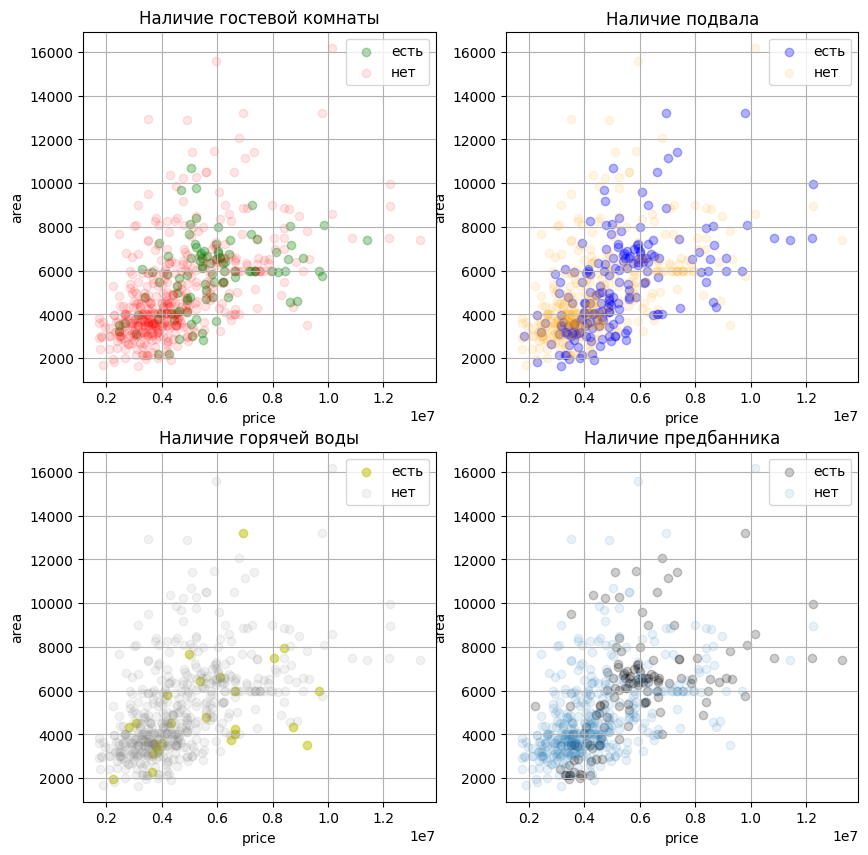

In [ ]:
fid, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].scatter(df[df['guestroom'] == 'yes']['price'], df[df['guestroom'] == 'yes']['area'], label='есть', color='g', alpha=0.3)
ax[0, 0].scatter(df[df['guestroom'] == 'no']['price'], df[df['guestroom'] == 'no']['area'], label='нет', color='r', alpha=0.1)
ax[0, 0].set_xlabel('price')
ax[0, 0].set_ylabel('area')
ax[0, 0].set_title('Наличие гостевой комнаты')
ax[0, 0].grid()
ax[0, 0].legend()

ax[0, 1].scatter(df[df['basement'] == 'yes']['price'], df[df['basement'] == 'yes']['area'], label='есть', color='b', alpha=0.3)
ax[0, 1].scatter(df[df['basement'] == 'no']['price'], df[df['basement'] == 'no']['area'], label='нет', color='orange', alpha=0.1)
ax[0, 1].set_xlabel('price')
ax[0, 1].set_ylabel('area')
ax[0, 1].set_title('Наличие подвала')
ax[0, 1].grid()
ax[0, 1].legend()

ax[1, 0].scatter(df[df['hotwaterheating'] == 'yes']['price'], df[df['hotwaterheating'] == 'yes']['area'], label='есть', color='y', alpha=0.5)
ax[1, 0].scatter(df[df['hotwaterheating'] == 'no']['price'], df[df['hotwaterheating'] == 'no']['area'], label='нет', color='grey', alpha=0.1)
ax[1, 0].set_xlabel('price')
ax[1, 0].set_ylabel('area')
ax[1, 0].set_title('Наличие горячей воды')
ax[1, 0].grid()
ax[1, 0].legend()

ax[1, 1].scatter(df[df['prefarea'] == 'yes']['price'], df[df['prefarea'] == 'yes']['area'], label='есть', color='black', alpha=0.2)
ax[1, 1].scatter(df[df['prefarea'] == 'no']['price'], df[df['prefarea'] == 'no']['area'], label='нет', alpha=0.1)
ax[1, 1].set_xlabel('price')
ax[1, 1].set_ylabel('area')
ax[1, 1].set_title('Наличие предбанника')
ax[1, 1].grid()
ax[1, 1].legend()

plt.show()

### 4 часть

## Постройте 2 гистограммы распределения цены на одном графике. Одна должна соответствовать домам с наличием кондиционирования(airconditioning), а другой с отсутствием. Одна гистограмма может частично закрывать другую и данных может быть невидно. Решите эту проблему. График гистограмм должен быть оформлен не хуже предыдущих графиков.

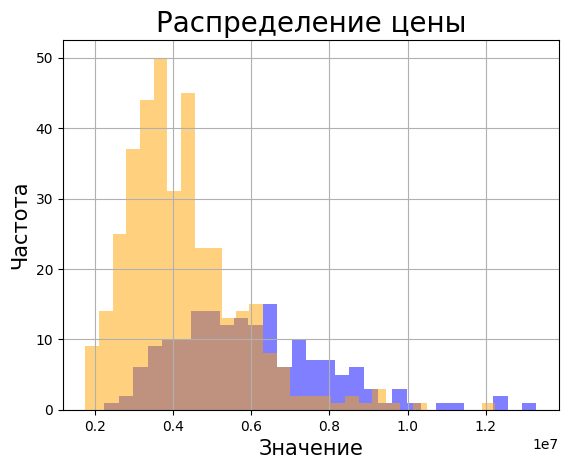

In [5]:
plt.hist(df[df['airconditioning'] == 'yes']['price'], color='b', bins=30, alpha=0.5)
plt.hist(df[df['airconditioning'] == 'no']['price'], color='orange', bins=30, alpha=0.5)
plt.title('Распределение цены', fontsize=20)
plt.xlabel('Значение', fontsize=15)
plt.ylabel('Частота', fontsize=15)
plt.grid()

plt.show()